In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [2]:
df = pd.read_csv("Estuarine_Crocodile.csv")
df.head()

,Species,CommonName,HeadLength,BodyLength
0,Crocodylus porosus,Estuarine Crocodile,24,161
1,Crocodylus porosus,Estuarine Crocodile,24,179
2,Crocodylus porosus,Estuarine Crocodile,32,226
3,Crocodylus porosus,Estuarine Crocodile,35,259
4,Crocodylus porosus,Estuarine Crocodile,40,287


In [3]:
df["BodyLength"].corr(df["HeadLength"])

0.9898911439276338

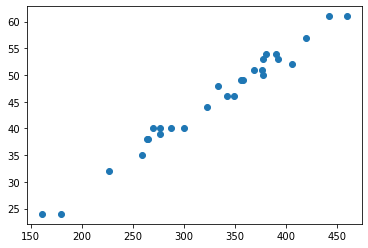

In [4]:
plt.scatter(x=df["BodyLength"], y=df["HeadLength"])

(-100.0, 100.0)

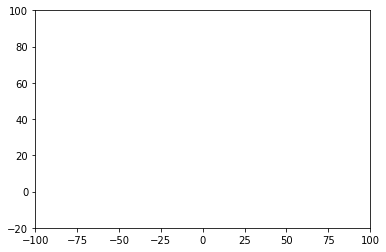

In [5]:
plt.scatter(x=df["BodyLength"], y=df["HeadLength"])
plt.ylim([-20, 100])
plt.xlim([-100, 100])

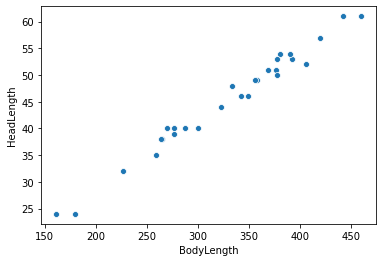

In [6]:
sns.scatterplot(x=df["BodyLength"], y=df["HeadLength"])

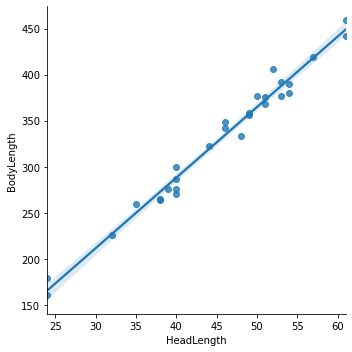

In [7]:
sns.lmplot(data=df, x="HeadLength", y="BodyLength")
# which should be variable x which should be variable y

In [8]:
help(sns.lmplot)

Help on function lmplot in module seaborn.regression:

lmplot(x, y, data, hue=None, col=None, row=None, palette=None, col_wrap=None, height=5, aspect=1, markers='o', sharex=True, sharey=True, hue_order=None, col_order=None, row_order=None, legend=True, legend_out=True, x_estimator=None, x_bins=None, x_ci='ci', scatter=True, fit_reg=True, ci=95, n_boot=1000, units=None, seed=None, order=1, logistic=False, lowess=False, robust=False, logx=False, x_partial=None, y_partial=None, truncate=True, x_jitter=None, y_jitter=None, scatter_kws=None, line_kws=None, size=None)
    Plot data and regression model fits across a FacetGrid.
    
    This function combines :func:`regplot` and :class:`FacetGrid`. It is
    intended as a convenient interface to fit regression models across
    conditional subsets of a dataset.
    
    When thinking about how to assign variables to different facets, a general
    rule is that it makes sense to use ``hue`` for the most important
    comparison, followed by ``

### Linear Regression

In [9]:
X = df["HeadLength"]
Y = df["BodyLength"]
X = sm.add_constant(X)

In [10]:
'''stat model has no intercept
 Y = mX
for each variable , state model will give a coefficient, but no intercept
if I have X, Z
Statsmodels does: Y=mX+nZ
trick Z=1
Y= mX + n*1 = mX+n'''

'stat model has no intercept\n Y = mX\nfor each variable , state model will give a coefficient, but no intercept\nif I have X, Z\nStatsmodels does: Y=mX+nZ\ntrick Z=1\nY= mX + n*1 = mX+n'

In [11]:
model = sm.OLS(Y, X)
print(model)

In [12]:
results = model.fit()
print(results)

In [13]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             BodyLength   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     1267.
Date:                Tue, 10 Nov 2020   Prob (F-statistic):           1.38e-23
Time:                        19:54:46   Log-Likelihood:                -105.32
No. Observations:                  28   AIC:                             214.6
Df Residuals:                      26   BIC:                             217.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -18.2740      9.966     -1.834      0.078     -38.760       2.212
HeadLength     7.6601      0.215     35.588      0.000       7.218       8.103
==============================================================================
Omnibus:                        0.667   Durbin-Watson:                   2.342
Prob(Omnibus):                  0.716   Jarque-Bera (JB):                0.597
Skew:                           0.323   Prob(JB):                        0.742
Kurtosis:                       2.693   Cond. No.                         226.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
Y_pred = results.predict(X)

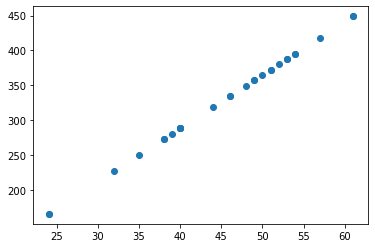

In [15]:
plt.plot(X["HeadLength"], Y_pred, "o")

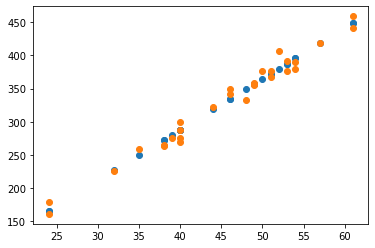

In [16]:

plt.plot(X["HeadLength"], Y_pred, "o")
plt.plot(X["HeadLength"], Y, "o")

In [17]:
residuals = Y - Y_pred

In [18]:
residuals

0     -4.568483
1     13.431517
2     -0.849320
3      9.170366
4     -1.130157
5     11.869843
6      7.909215
7    -16.410995
8     25.948587
9     10.007645
10     3.608691
11   -15.371623
12    -7.809948
13    14.909215
14    -8.809948
15     0.928901
16    -4.470053
17    -1.071099
18   -18.130157
19     4.288482
20    -6.992355
21   -10.711518
22     3.229424
23    -5.371623
24    12.268796
25     0.648063
26   -12.130157
27    -4.391309
dtype: float64

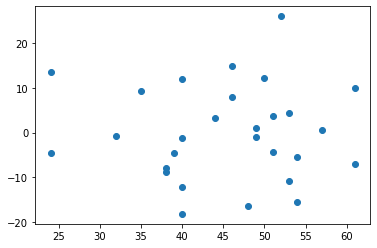

In [19]:
# if the residual is not randam in a line, that means the erros all be negative or positive
# solution include more variable male femal , feet 
plt.plot(X["HeadLength"], residuals, "o")

In [20]:
np.mean(residuals**2)
# mean squared error the lower the better

108.3283270759337

In [21]:
np.sqrt(np.mean(residuals**2)) #RMSE root mean squre erro

10.408089501725746

### Using the FitBit Dataset


In [22]:
df_new = pd.read_csv("../../03_data-visualization/02_lab-matplotlib-seaborn/your-code/Fitbit2.csv")
df_new.head()

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,...,0.403891,Friday,4.0,1,6.400000,92.086331,0.000000,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,...,8.767545,Saturday,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,...,6.567891,Sunday,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5
3,2015-05-11,2673,6756,5.02,8,749.000,190,23,4,9620,...,3.119282,Monday,0.0,1,5.183333,88.857143,6.450000,88.761468,May,5
4,2015-05-12,2495,502,3.73,1,876.000,171,0,0,7360,...,2.317714,Tuesday,1.0,1,6.783333,82.892057,5.183333,88.857143,May,5


In [23]:
'''steps:
1. correlation matrix
2. scatterplot MinutesOfBeingAwake versus NumberOfAwakings
3. regression with statsmodels: [MinutesOfBeingAwake] = b0 + b1*[NumberOfAwakings]'''


'steps:\n1. correlation matrix\n2. scatterplot MinutesOfBeingAwake versus NumberOfAwakings\n3. regression with statsmodels: [MinutesOfBeingAwake] = b0 + b1*[NumberOfAwakings]'

In [24]:
df_new.corr()

,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,...,NumberOfAwakings,LengthOfRestInMinutes,Distance_miles,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months_encoded
Calorie burned,1.000000,0.255305,0.292790,0.130757,0.125353,0.209540,0.188256,0.197881,-0.130758,0.011485,...,0.030490,0.017460,0.292790,-0.041630,0.064943,0.011485,0.040965,0.048411,0.021207,0.005841
Steps,0.255305,1.000000,0.779678,0.306511,0.076906,0.393010,0.303244,0.571452,-0.160568,0.130986,...,0.106591,0.133405,0.779678,-0.024671,0.006498,0.130986,0.128463,0.089991,0.083499,-0.097077
Distance,0.292790,0.779678,1.000000,0.382940,0.160632,0.455272,0.348113,0.759310,-0.246853,0.129442,...,0.091095,0.134550,1.000000,-0.056472,0.069438,0.129442,0.126663,0.107858,0.075439,-0.122106
Floors,0.130757,0.306511,0.382940,1.000000,0.057812,-0.085992,0.278408,0.399503,-0.155532,0.069464,...,0.043459,0.075864,0.382940,-0.243848,0.296749,0.069464,0.057192,0.111600,0.092766,-0.032347
Minutes Sedentary,0.125353,0.076906,0.160632,0.057812,1.000000,0.217021,0.084137,0.105963,-0.161446,0.204242,...,0.178387,0.208539,0.160632,-0.069168,0.071185,0.204242,0.251996,0.069396,0.058520,-0.107068
Minutes Lightly Active,0.209540,0.393010,0.455272,-0.085992,0.217021,1.000000,0.014288,-0.034425,-0.219892,0.105048,...,0.087150,0.105406,0.455272,0.202433,-0.197896,0.105048,0.101216,0.020973,0.040472,-0.066958
Minutes Fairly Active,0.188256,0.303244,0.348113,0.278408,0.084137,0.014288,1.000000,0.337839,-0.204562,0.114950,...,0.100498,0.123034,0.348113,-0.098541,0.110282,0.114950,0.092485,0.191620,0.136397,0.105570
Minutes Very Active,0.197881,0.571452,0.759310,0.399503,0.105963,-0.034425,0.337839,1.000000,-0.187309,0.108018,...,0.099859,0.115641,0.759310,-0.111718,0.103940,0.108018,0.106693,0.120500,0.073853,-0.085153
Activity Calories,-0.130758,-0.160568,-0.246853,-0.155532,-0.161446,-0.219892,-0.204562,-0.187309,1.000000,-0.005804,...,0.022757,-0.004992,-0.246853,-0.074707,0.044292,-0.005804,-0.020122,-0.074408,-0.064989,-0.004207
MinutesOfSleep,0.011485,0.130986,0.129442,0.069464,0.204242,0.105048,0.114950,0.108018,-0.005804,1.000000,...,0.780512,0.997184,0.129442,-0.033913,0.094152,1.000000,0.807964,0.148113,0.095999,-0.127980


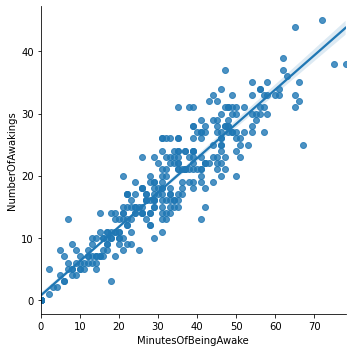

In [25]:
sns.lmplot(data=df_new, x="MinutesOfBeingAwake", y="NumberOfAwakings")

In [26]:
Y = df_new["MinutesOfBeingAwake"]
X = df_new["NumberOfAwakings"]
X = sm.add_constant(X)


In [27]:
model = sm.OLS(Y, X)
print(model)
results = model.fit()
print(results)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     MinutesOfBeingAwake   R-squared:                       0.906
Model:                             OLS   Adj. R-squared:                  0.906
Method:                  Least Squares   F-statistic:                     3516.
Date:                 Tue, 10 Nov 2020   Prob (F-statistic):          1.89e-189
Time:                         19:54:48   Log-Likelihood:                -1158.1
No. Observations:                  367   AIC:                             2320.
Df Residuals:                      365   BIC:                             2328.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                1.4381      0.538      2.675      0.008       0.381       2.495
NumberOfAwakings     1.6405      0.028     59.297      0.000       1.586       1.695
==============================================================================
Omnibus:                       17.535   Durbin-Watson:                   1.830
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.142
Skew:                           0.290   Prob(JB):                     1.73e-07
Kurtosis:                       4.304   Cond. No.                         35.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
# Y = b0 + b1 * X
# [MinutesOfAwake] = 1.4381 + 1.64050*[NumberOfAwakings]
# NumberOfAwakings = 5
# NumberofAwakings = 9.64

# goodness of fit -> how good the prediction is from R-squared to BIC
# 
# Adj R-squared new variable will go down if this new variable is less to do with y
# Adj R-squared go up-> new variable is more relevant, Adj R-squared go down-> new variable is less relevant, canbe kicked out

In [29]:
Y_pred = results.predict(X)
residuals = Y - Y_pred
residuals


0     -13.169929
1      -0.888900
2       3.549043
3      -4.888900
4      -8.620726
         ...    
362     2.032642
363     6.437783
364     8.954184
365     4.470585
366     4.705958
Length: 367, dtype: float64

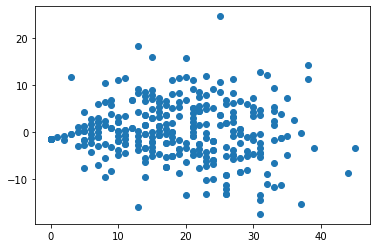

In [30]:
plt.scatter(X["NumberOfAwakings"], residuals)

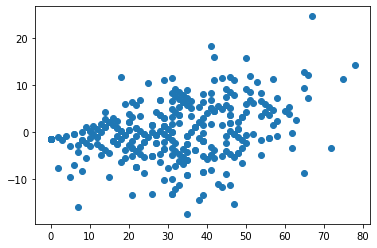

In [31]:
plt.scatter(Y, residuals)

### Estimating OLS using statsmodel

In [32]:
# one more assumption: the variable should not be strongly correlated
# we analysis look at the one idividually  one variable move (to caculate the coffecient), the rest of variables suppose to be stable
# that is why we look at the correlation first


In [33]:
Y = df_new["MinutesOfBeingAwake"]
X = df_new[["NumberOfAwakings", "Distance_miles"]]
X = sm.add_constant(X)
model = sm.OLS(Y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     MinutesOfBeingAwake   R-squared:                       0.908
Model:                             OLS   Adj. R-squared:                  0.907
Method:                  Least Squares   F-statistic:                     1794.
Date:                 Tue, 10 Nov 2020   Prob (F-statistic):          3.22e-189
Time:                         19:54:48   Log-Likelihood:                -1154.3
No. Observations:                  367   AIC:                             2315.
Df Residuals:                      364   BIC:                             2326.
Df Model:                            2                                         
Covariance Type:             nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.5001      0.881     -0.567      0.571      -2.233       1.233
NumberOfAwakings     1.6336      0.028     59.332      0.000       1.579       1.688
Distance_miles       0.3860      0.140      2.761      0.006       0.111       0.661
==============================================================================
Omnibus:                       17.462   Durbin-Watson:                   1.879
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               32.472
Skew:                           0.270   Prob(JB):                     8.89e-08
Kurtosis:                       4.353   Cond. No.                         60.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
# std err = std.dev / sqrt(n)
# t = coef / std err
# R-squared 0,906 smaller model is better??
# std err smaller means more presicion
# the chance we are seeing the relationshp of this co
# P>|t| hypothesse
# hypothese is our model is crab, the probability is very low <5% , reject the hypothese
# coef is the correlation between Y and X
# you don't want high correlation between X1 and X2

In [41]:
df_new["Sleep efficiency"].describe()

count    367.000000
mean      76.362799
std       32.973194
min        0.000000
25%       86.238532
50%       89.433962
75%       92.438419
max      100.000000
Name: Sleep efficiency, dtype: float64

In [43]:
# we define: efficient sleep is a value above 90
np.where(df_new["Sleep efficiency"]>90, 1, 0)

array([1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,

In [44]:
X = pd.DataFrame()
Y = df_new["MinutesOfBeingAwake"]
X["EfficientSleep"] = np.where(df_new["Sleep efficiency"] > 90, 1, 0)
X = sm.add_constant(X)
model = sm.OLS(Y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     MinutesOfBeingAwake   R-squared:                       0.029
Model:                             OLS   Adj. R-squared:                  0.026
Method:                  Least Squares   F-statistic:                     10.72
Date:                 Tue, 10 Nov 2020   Prob (F-statistic):            0.00116
Time:                         20:06:00   Log-Likelihood:                -1586.6
No. Observations:                  367   AIC:                             3177.
Df Residuals:                      365   BIC:                             3185.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             30.9137      1.304     23.710      0.000      28.350      33.478
EfficientSleep    -6.2725      1.916     -3.274      0.001     -10.040      -2.505
==============================================================================
Omnibus:                       17.383   Durbin-Watson:                   1.768
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               10.279
Skew:                          -0.251   Prob(JB):                      0.00586
Kurtosis:                       2.351   Cond. No.                         2.54
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
df_new["Days"].value_counts()

Friday       54
Saturday     53
Tuesday      52
Thursday     52
Sunday       52
Monday       52
Wednesday    52
Name: Days, dtype: int64

In [50]:
X = pd.get_dummies(df_new["Days"], drop_first=True)
X
# not all the row has 1

,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,1,0,0,0
3,1,0,0,0,0,0
4,0,0,0,0,1,0
...,...,...,...,...,...,...
362,0,0,0,0,1,0
363,0,0,0,0,0,1
364,0,0,0,1,0,0
365,0,0,0,0,0,0


In [51]:
Y = df_new["MinutesOfBeingAwake"]
X = pd.get_dummies(df_new["Days"], drop_first=True)
X = sm.add_constant(X)
model = sm.OLS(Y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     MinutesOfBeingAwake   R-squared:                       0.015
Model:                             OLS   Adj. R-squared:                 -0.002
Method:                  Least Squares   F-statistic:                    0.8900
Date:                 Tue, 10 Nov 2020   Prob (F-statistic):              0.502
Time:                         20:24:59   Log-Likelihood:                -1589.2
No. Observations:                  367   AIC:                             3192.
Df Residuals:                      360   BIC:                             3220.
Df Model:                            6                                         
Covariance Type:             nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         28.0370      2.525     11.102      0.000      23.071      33.004
Monday        -2.4793      3.606     -0.688      0.492      -9.570       4.612
Saturday      -1.3767      3.588     -0.384      0.701      -8.433       5.680
Sunday        -0.9024      3.606     -0.250      0.803      -7.993       6.188
Thursday       4.9630      3.606      1.376      0.170      -2.128      12.054
Tuesday       -1.1332      3.606     -0.314      0.753      -8.224       5.958
Wednesday      0.7514      3.606      0.208      0.835      -6.339       7.842
==============================================================================
Omnibus:                       25.696   Durbin-Watson:                   1.808
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                9.589
Skew:                           0.062   Prob(JB):                      0.00827
Kurtosis:                       2.218   Cond. No.                         7.77
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# silimar as the binanry male or female
# baseline category:Friday
# if Monday is significant monday is 2,4 mins less awake comparing to Friday

## Logistic Regression


In [52]:
Y = pd.DataFrame(np.where(df_new["Sleep efficiency"] > 90, 1, 0))
X = df_new["MinutesOfBeingAwake"]
X = sm.add_constant(X)
model = sm.Logit(Y, X)
results = model.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.676012
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      0   No. Observations:                  367
Model:                          Logit   Df Residuals:                      365
Method:                           MLE   Df Model:                            1
Date:                Tue, 10 Nov 2020   Pseudo R-squ.:                 0.02089
Time:                        20:41:27   Log-Likelihood:                -248.10
converged:                       True   LL-Null:                       -253.39
Covariance Type:            nonrobust   LLR p-value:                  0.001138
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.3719      0.193      1.930      0.054      -0.006       0.750
MinutesOfBeingAwake    -0.0187      0.006     -3.202      0.001      -0.030      -0.007
=======================================================================================
"""

In [54]:
results.predict(X) use X to predict Y 
# probability of sleeping efficient

0      0.471448
1      0.429803
2      0.380273
3      0.448225
4      0.300747
         ...   
362    0.438993
363    0.494796
364    0.429803
365    0.398055
366    0.333117
Length: 367, dtype: float64

In [58]:
results.predict((1, 35))
# 1 referes to constant

array([0.42980253])